In [1]:
import pickle
import pandas as pd
import os
import setup

import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm.notebook import tqdm, trange
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import wandb
from torch.utils.data.sampler import SubsetRandomSampler
import pprint
import matplotlib.pyplot as plt
import torch

from sklearn.preprocessing import MinMaxScaler
import math
from torch.profiler import profile, record_function, ProfilerActivity

from operator import itemgetter
import operator
from random import randint
# from rnn_classes import Dog, DogInput, Race, Races, GRUNet, smallGRUNet, smalll_lin_GRUNet, smalll_prelin_GRUNet
import rnn_tools.rnn_classes as rnn_classes
from rnn_tools.raceDB import build_dataset
import importlib
import datetime
from rnn_tools.model_saver import model_saver, model_saver_wandb
import rnn_tools.training_testing_gru as training_testing_gru
from torch.nn.utils.rnn import pack_padded_sequence, pack_sequence, pad_packed_sequence,pad_sequence, unpack_sequence, unpad_sequence
import rnn_tools.training_testing_gru_double as training_testing_gru_double
import rnn_tools.training_testing_lstm as training_testing_lstm
from goto_conversion import goto_conversion

import rnn_tools.training_testing_gru_extra_data as training_testing_gru_extra_data

c:\Users\Nick\Documents\GitHub\grvmodel\python


In [2]:
x = torch.rand(5,10,20)

In [4]:
x.sum(dim=2).shape

torch.Size([5, 10])

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc.
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [3]:
torch.set_default_tensor_type(torch.FloatTensor)

c:\Users\Nick\.conda\envs\python311\Lib\site-packages\torch\__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\tensor\python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)


In [4]:
torch.__version__

'2.1.1'

In [5]:
['dist_last__1', 'box_last__1', 'speed_avg_1', 'split_speed_v1_1', 'split_speed_avg_1', 'split_margin_avg_1', 'margin_avg_1', 'margin_time_avg_1', 'RunHomeTime_1', 'run_home_speed_1', 'run_home_speed_v1_1', 'first_out_avg_1', 'pos_out_avg_1', 'post_change_avg_1', 'races_1', 'wins_1', 'wins_last_1', 'weight_', 'min_time_', 'min_split_time_', 'min_split_time_v1', 'last_start_price', 'last_start_prob']

['dist_last__1',
 'box_last__1',
 'speed_avg_1',
 'split_speed_v1_1',
 'split_speed_avg_1',
 'split_margin_avg_1',
 'margin_avg_1',
 'margin_time_avg_1',
 'RunHomeTime_1',
 'run_home_speed_1',
 'run_home_speed_v1_1',
 'first_out_avg_1',
 'pos_out_avg_1',
 'post_change_avg_1',
 'races_1',
 'wins_1',
 'wins_last_1',
 'weight_',
 'min_time_',
 'min_split_time_',
 'min_split_time_v1',
 'last_start_price',
 'last_start_prob']

In [6]:
def custom_l2(output, target):
    loss = torch.mean(abs(output-target), dim=1)
    return loss

In [7]:
def validation_CLE(x,y):
    loss_t = -torch.log(torch.exp(x)/torch.sum(torch.exp(x), dim=-1, keepdim=True))*y
    return loss_t

In [8]:
tracks = ['Sandown Park',
 'The Meadows',
 'Warragul',
 'Geelong',
 'Sale',
 'Ballarat',
 'Bendigo',
 'Cranbourne']

In [9]:
os.getcwd()
import rnn_tools.raceDB
importlib.reload(rnn_tools.raceDB)
# os.chdir(r"C:\Users\Nick\Documents\GitHub\grvmodel\Python\DATA")                                                                                                                                                                                                                                                                                                                             
date = datetime.datetime.strptime("2022-08-01", "%Y-%m-%d").date()
hidden_size = 32
states = ["NZ"]
data_file = './data/gru_inputs_kitchen_sink_new_not_simple.fth'
raceDB = rnn_tools.raceDB.build_dataset(data_file, hidden_size ,state_filter=states, margin_type='boosted_sftmin',v6=True)
raceDB.create_new_weights_v2()

c:\Users\Nick\Documents\GitHub\grvmodel\python
[['inside', 'midfield', 'wide', 'weight', 'DogGrade', '_dist_last__1', '_box_last__1', '_speed_avg_1', '_split_speed_avg_1', '_split_margin_avg_1', '_margin_avg_1', '_margin_time_avg_1', '_RunHomeTime_1', '_run_home_speed_1', '_first_out_avg_1', '_pos_out_avg_1', '_post_change_avg_1', '_races_1', '_wins_1', '_wins_last_1', '_weight_', '_min_time_', '_min_split_time_', '_last_start_price', '_last_start_prob', 'dist_dist_last__10', 'dist_box_last__10', 'dist_speed_avg_10', 'dist_split_speed_avg_10', 'dist_split_margin_avg_10', 'dist_margin_avg_10', 'dist_margin_time_avg_10', 'dist_RunHomeTime_10', 'dist_run_home_speed_10', 'dist_first_out_avg_10', 'dist_pos_out_avg_10', 'dist_post_change_avg_10', 'dist_races_10', 'dist_wins_10', 'dist_wins_last_10', 'dist_weight_', 'dist_min_time_', 'dist_min_split_time_', 'dist_last_start_price', 'dist_last_start_prob', 'box_dist_last__10', 'box_box_last__10', 'box_speed_avg_10', 'box_split_speed_avg_10', '

100%|██████████| 25/25 [00:00<00:00, 25019.71it/s]
c:\Users\Nick\Documents\GitHub\grvmodel\python\rnn_tools\rnn_classes.py:391: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  r.prob = torch.tensor((1/(torch.tensor(r.start_prices)+0.0001))/((1/torch.tensor(r.start_prices)).sum()+0.0001),device=self.device)


number of races = 20849, number of unique dogs = 4029
0            (Auckland, 318.0)
1            (Wanganui, 305.0)
2        (Christchurch, 295.0)
3        (Christchurch, 295.0)
4        (Christchurch, 520.0)
                 ...          
20844       (Southland, 457.0)
20845         (Waikato, 457.0)
20846       (Southland, 457.0)
20847         (Waikato, 375.0)
20848       (Southland, 390.0)
Length: 20849, dtype: object


In [10]:
data = pd.read_feather(data_file)

In [11]:
data.stats.iloc[0].shape

(106,)

In [12]:
raceDB.stats_cols = eval(raceDB.stats_cols)[0]

In [13]:
# raceDB.stats_cols = ['box']+raceDB.stats_cols

In [14]:
for i,s in enumerate(raceDB.stats_cols):
    print(i,s)

0 inside
1 midfield
2 wide
3 weight
4 DogGrade
5 _dist_last__1
6 _box_last__1
7 _speed_avg_1
8 _split_speed_avg_1
9 _split_margin_avg_1
10 _margin_avg_1
11 _margin_time_avg_1
12 _RunHomeTime_1
13 _run_home_speed_1
14 _first_out_avg_1
15 _pos_out_avg_1
16 _post_change_avg_1
17 _races_1
18 _wins_1
19 _wins_last_1
20 _weight_
21 _min_time_
22 _min_split_time_
23 _last_start_price
24 _last_start_prob
25 dist_dist_last__10
26 dist_box_last__10
27 dist_speed_avg_10
28 dist_split_speed_avg_10
29 dist_split_margin_avg_10
30 dist_margin_avg_10
31 dist_margin_time_avg_10
32 dist_RunHomeTime_10
33 dist_run_home_speed_10
34 dist_first_out_avg_10
35 dist_pos_out_avg_10
36 dist_post_change_avg_10
37 dist_races_10
38 dist_wins_10
39 dist_wins_last_10
40 dist_weight_
41 dist_min_time_
42 dist_min_split_time_
43 dist_last_start_price
44 dist_last_start_prob
45 box_dist_last__10
46 box_box_last__10
47 box_speed_avg_10
48 box_split_speed_avg_10
49 box_split_margin_avg_10
50 box_margin_avg_10
51 box_margi

In [15]:
from rnn_tools.rnn_classes import Races,Dog, DogInput, Race

In [16]:
import rnn_tools.raceDB

In [17]:
races = raceDB.get_race_input(range(1000,1100))
[r.race_date for r in races]

[datetime.date(2020, 2, 2),
 datetime.date(2020, 2, 2),
 datetime.date(2020, 2, 2),
 datetime.date(2020, 2, 2),
 datetime.date(2020, 2, 2),
 datetime.date(2020, 2, 2),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 4),
 datetime.date(2020,

In [18]:
stat_list = ['dist_last__1', 'box_last__1', 'speed_avg_1', 'split_speed_v1_1', 'split_speed_avg_1', 'split_margin_avg_1', 'margin_avg_1', 'margin_time_avg_1', 'RunHomeTime_1', 'run_home_speed_1', 'run_home_speed_v1_1', 'first_out_avg_1', 'pos_out_avg_1', 'post_change_avg_1', 'races_1', 'wins_1', 'wins_last_1', 'weight_', 'min_time_', 'min_split_time_', 'min_split_time_v1', 'last_start_price', 'last_start_prob']


In [33]:
def closure(optimizer, criterion, outs, classes):
    optimizer.zero_grad()
    loss = nn.functional.mse_loss(outs, classes)
    loss.backward()
    return loss

def model_pipeline(my_dataset=raceDB,config=None,prev_model=None, sweep=True, model_state_dict=None, prev_model_file=None, prev_model_version='450'):
    if my_dataset:
      dataset = my_dataset    
    else:
      dataset = raceDB
    # tell wandb to get started
    with wandb.init(project="NEW GRU V7", config=config,save_code=False):
      #  access all HPs through wandb.config, so logging matches execution!
      wandb.define_metric("loss_val", summary="min")
      wandb.define_metric("accuracy", summary="max")
      wandb.define_metric("ROI < 30", summary="max")
      wandb.define_metric("relu roi", summary="max")
      
      config = wandb.config
      pprint.pprint(config)
      pprint.pprint(config.epochs)
      print(config)
      # input_size = raceDB.get_race_input([0,1])[0].full_input.shape[0] #create fix so messy
      print(config.input_type)

      stat_mask = [1,1,1]
      for stat in stat_list:
          stat_flag = config[stat]
          stat_mask = stat_mask+[stat_flag]

      print(stat_mask)
      stat_mask = [1]*26+[0]*80
      data_mask = [0]*26+[1]*20+[1]*20+[1]*20+[1]*20 # Reg, Dist, Box, T_box, T_dist
      data_mask_size = sum(data_mask)
      stat_mask = torch.tensor(stat_mask).type(torch.bool).to(device)
      data_mask = torch.tensor(data_mask).type(torch.bool).to(device)
      wandb.run.log_code('rnn_tools/')
      # stat_mask = torch.ones_like(stat_mask).type(torch.bool).to(device)

      print(stat_mask)
      print(stat_mask.shape)

      if 'batch_days' in config.keys():
        pass
        # raceDB.create_test_split_date(config['training_date_end'],val_date='2023-07-01')
        # raceDB.create_dogs_test_split_date()
        # raceDB.attach_races_to_dog_inputv2() 
        # raceDB.reset_hidden()
        # raceDB.create_batches(batch_days=config['batch_days'], end_date = config['training_date_end'], stat_mask=stat_mask,data_mask=data_mask)

      if config['input_type'] == 'basic':
          print('here')
          raceDB.batches['packed_x'] = raceDB.batches['packed_x_basic']
          raceDB.batches['packed_y'] = raceDB.batches['packed_y_basic']
          raceDB.batches['packed_v'] = raceDB.batches['packed_v_basic']
          input_size = raceDB.batches['packed_x'][0].data[0].shape[0]

      # for race in raceDB.racesDict.values():
      #     for dog_input in race.dogs:
      #       dog_input.stats_masked = dog_input.stats.masked_select(stat_mask) 


      print(f"{input_size=}")
      config['stat_mask_tensor'] = torch.tensor(stat_mask, dtype=torch.uint8).to(device)     
      raceDB.reset_hidden(num_layers=config['num_layers'], hidden_size=config['hidden_size'])
      model = rnn_classes.GRUNetv3_extra_attn(input_size,config['hidden_size'], num_layers=config['num_layers'],fc0_size=config['f0_layer_size'], fc1_size=config['f1_layer_size'],data_mask_size=data_mask_size)
      optimizer = optim.AdamW(model.parameters(), lr=config['learning_rate'])
      
      if model_state_dict:
        model.load_state_dict(model_state_dict)
      if prev_model_file!=None:
        print(f"Loading model {prev_model_file}, version {prev_model_version}")
        model_name = prev_model_file
        model_loc = f"C:/Users/Nick/Documents/GitHub/grvmodel/Python/pytorch/New Model/savedmodel/{model_name}/{model_name}_{prev_model_version}.pt"
        model_data = torch.load(model_loc,map_location=torch.device('cuda:0'))
        print(model_data['model_state_dict'].keys())
        model.load_state_dict(model_data['model_state_dict'], strict=True)
        config['parent model'] = prev_model_file
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])
        # optimizer.load_state_dict(model_data['optim'])
        # optimizer.to(device)
      else:
        optimizer = optim.RAdam(model.parameters(), lr=config['learning_rate'])

      raceDB.to_cuda()
      criterion = nn.CrossEntropyLoss(reduction='none')

      model = model.to(device)
      print(model)

      # and use them to train the model
      wandb.watch(model, log='all')
      try:
        # train_double_loss_regular(model, dataset, criterion, optimizer, scheduler, config, crit2=custom_l2)
        training_testing_gru_extra_data.train_double_v3(model, dataset, criterion, optimizer, 'na', config)
      except (KeyboardInterrupt) as error:
        print(error)
        print("finished Early")
        
      # dataset.create_hidden_states_dict()
      raceDB.create_hidden_states_dict_v2()
      model_saver_wandb(model, optimizer, 450, 0.1, raceDB.hidden_states_dict_gru_v6,raceDB.train_hidden_dict , model_name="long nsw new  22000 RUN")
      if sweep:
        # raceDB.reset_all_lstm_states
        raceDB.reset_hidden()
    


    # and test its final performance
    #test(model, test_loader)

    return (model,dataset, optimizer)

In [20]:
wandb_config_static = {
    'hidden_size': 256,
    'stats': raceDB.stats_cols,
    'races': states,
    'datafile': data_file,
    'latest_date': raceDB.latest_date,
    'input_type': 'basic',
    'num_layers': 2,
    'batch_size': 750,
    'dropout': 0.3,
    'epochs': 5000,
    'learning_rate': 0.001,
    'optimizer': 'adamW',
    'f0_layer_size': 128,
    'f1_layer_size': 64,
    'training_date_end': '2023-01-01',
    'notes':'Testing new CONV layer',
    'batch_days': 365,
    'dist_last__1': 1,  #
    'box_last__1': 1,  #
    'speed_avg_1': 1,  #
    'split_speed_v1_1': 0,  #
    'split_speed_avg_1': 0,  #
    'split_margin_avg_1': 1,
    'margin_avg_1': 1,  #
    'margin_time_avg_1': 1,  #
    'RunHomeTime_1': 1,
    'run_home_speed_1': 1,
    'run_home_speed_v1_1': 0,
    'first_out_avg_1': 1,  #
    'pos_out_avg_1': 1,  #
    'post_change_avg_1': 1,  #
    'races_1': 0,
    'wins_1': 0,
    'wins_last_1': 1,
    'weight_': 1,  #
    'min_time_': 1,  #
    'min_split_time_': 1,
    'min_split_time_v1': 0,  #
    'last_start_price': 0,  #
    'last_start_prob': 1,
}

In [21]:
raceDB.reset_hidden(num_layers=wandb_config_static['num_layers'], hidden_size=wandb_config_static['hidden_size'])

In [22]:
torch.cuda.empty_cache()

In [23]:
raceDB.race_prices_to_prob()

c:\Users\Nick\Documents\GitHub\grvmodel\python\rnn_tools\rnn_classes.py:391: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  r.prob = torch.tensor((1/(torch.tensor(r.start_prices)+0.0001))/((1/torch.tensor(r.start_prices)).sum()+0.0001),device=self.device)


In [24]:
raceDB.latest_date

Timestamp('2024-01-31 00:00:00')

In [54]:
x = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,float('-inf')])

In [69]:
x = torch.rand(10,100,64)

In [71]:
F.softmax(x,dim=-1)

tensor([[[0.0159, 0.0101, 0.0121,  ..., 0.0116, 0.0099, 0.0205],
         [0.0103, 0.0214, 0.0161,  ..., 0.0137, 0.0132, 0.0121],
         [0.0263, 0.0124, 0.0182,  ..., 0.0121, 0.0130, 0.0240],
         ...,
         [0.0139, 0.0140, 0.0164,  ..., 0.0171, 0.0189, 0.0200],
         [0.0106, 0.0109, 0.0113,  ..., 0.0099, 0.0150, 0.0138],
         [0.0137, 0.0126, 0.0148,  ..., 0.0119, 0.0155, 0.0119]],

        [[0.0100, 0.0185, 0.0187,  ..., 0.0095, 0.0112, 0.0225],
         [0.0237, 0.0146, 0.0147,  ..., 0.0160, 0.0172, 0.0168],
         [0.0201, 0.0190, 0.0159,  ..., 0.0109, 0.0154, 0.0224],
         ...,
         [0.0163, 0.0217, 0.0161,  ..., 0.0171, 0.0189, 0.0094],
         [0.0101, 0.0138, 0.0160,  ..., 0.0197, 0.0175, 0.0248],
         [0.0140, 0.0203, 0.0141,  ..., 0.0106, 0.0157, 0.0180]],

        [[0.0198, 0.0127, 0.0229,  ..., 0.0232, 0.0209, 0.0123],
         [0.0205, 0.0215, 0.0109,  ..., 0.0210, 0.0160, 0.0122],
         [0.0136, 0.0138, 0.0148,  ..., 0.0207, 0.0263, 0.

In [72]:
fc = nn.Linear(64, 1)

In [75]:
fc(x).shape

torch.Size([10, 100, 1])

In [95]:
attention_scores = fc(x)
idden_states = x
seq_length = hidden_states.size(0)
future_mask = torch.triu(torch.ones(seq_length, seq_length), diagonal=1).bool()
print(f"{future_mask.shape=}")
print(f"{attention_scores.shape=}")
attention_scores = attention_scores.repeat(1, 1, seq_length)
print(f"{attention_scores.shape=}")
future_mask = future_mask.unsqueeze(1).repeat(1,attention_scores.shape[1], 1)
attention_scores.masked_fill_(future_mask, float('-inf'))
attention_weights = F.softmax(attention_scores, dim=0)
indices = torch.arange(seq_length).to(attention_weights.device)
selected_attention_weights = attention_weights[indices, :, indices].unsqueeze(-1)

future_mask.shape=torch.Size([10, 10])
attention_scores.shape=torch.Size([10, 100, 1])
attention_scores.shape=torch.Size([10, 100, 10])


torch.Size([10, 4, 50])
torch.Size([10, 4, 1])


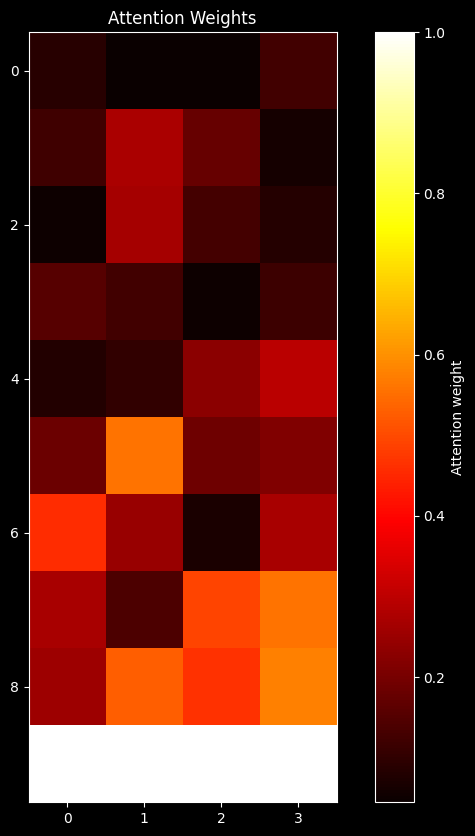

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def attention_function(hidden_states, hidden_size):
    fc = nn.Linear(hidden_size, 1)

    print(hidden_states.shape)
    attention_scores = fc(hidden_states)

    # Create mask to exclude future states
    seq_length = hidden_states.size(0)
    future_mask = torch.triu(torch.ones(seq_length, seq_length), diagonal=1).bool()
    attention_scores = attention_scores.repeat(1, 1, seq_length)
    future_mask = future_mask.unsqueeze(1).repeat(1,attention_scores.shape[1], 1)
    attention_scores.masked_fill_(future_mask, float('-inf'))
    attention_weights = F.softmax(attention_scores, dim=-0)
    indices = torch.arange(seq_length).to(attention_weights.device)
    selected_attention_weights = attention_weights[indices, :, indices].unsqueeze(-1)
    print(selected_attention_weights.shape)
    # print(selected_attention_weights.shape)
    # print(selected_attention_weights[5].shape)
    # print(selected_attention_weights[5])

    return selected_attention_weights

hidden_states = torch.randn(10, 4, 50)  # 10 time steps, 32 batch size, 50 hidden size
hidden_size = 50
attention_weights = attention_function(hidden_states, hidden_size)
# print(attention_weights)
# 
attention_weights_np = attention_weights.detach().squeeze().cpu().numpy()

# print(attention_weights_np.shape)

# Transpose array if necessary
attention_weights_np = attention_weights_np

plt.figure(figsize=(10, 10))
plt.imshow(attention_weights_np, cmap='hot', interpolation='nearest')
plt.colorbar(label='Attention weight')
plt.title('Attention Weights')
plt.show()

(10, 4)


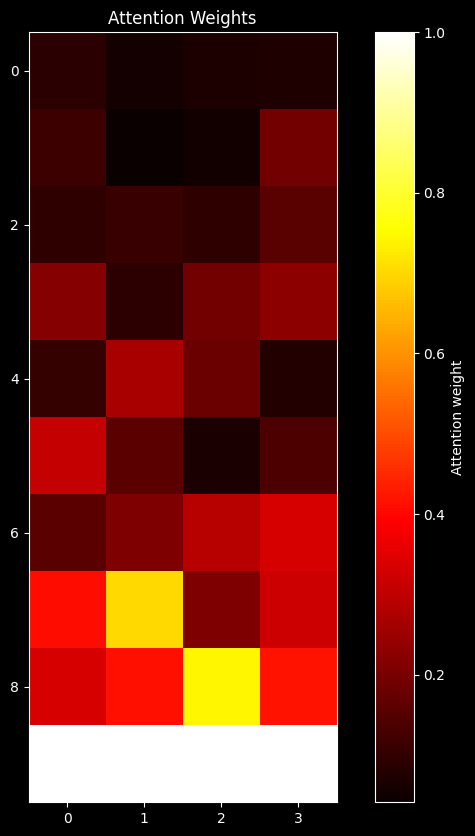

In [68]:
importlib.reload(training_testing_gru)

importlib.reload(training_testing_lstm)
importlib.reload(training_testing_gru_double)
importlib.reload(rnn_tools.rnn_classes)
importlib.reload(rnn_classes)
importlib.reload(training_testing_gru_extra_data)
(model,dataset, optimizer) = model_pipeline(raceDB,config=wandb_config_static,sweep=False)
# all_price_df = model_pipeline(raceDB,config=wandb_config_static,sweep=False)


{'hidden_size': 256, 'stats': ['inside', 'midfield', 'wide', 'weight', 'DogGrade', '_dist_last__1', '_box_last__1', '_speed_avg_1', '_split_speed_avg_1', '_split_margin_avg_1', '_margin_avg_1', '_margin_time_avg_1', '_RunHomeTime_1', '_run_home_speed_1', '_first_out_avg_1', '_pos_out_avg_1', '_post_change_avg_1', '_races_1', '_wins_1', '_wins_last_1', '_weight_', '_min_time_', '_min_split_time_', '_last_start_price', '_last_start_prob', 'dist_dist_last__10', 'dist_box_last__10', 'dist_speed_avg_10', 'dist_split_speed_avg_10', 'dist_split_margin_avg_10', 'dist_margin_avg_10', 'dist_margin_time_avg_10', 'dist_RunHomeTime_10', 'dist_run_home_speed_10', 'dist_first_out_avg_10', 'dist_pos_out_avg_10', 'dist_post_change_avg_10', 'dist_races_10', 'dist_wins_10', 'dist_wins_last_10', 'dist_weight_', 'dist_min_time_', 'dist_min_split_time_', 'dist_last_start_price', 'dist_last_start_prob', 'box_dist_last__10', 'box_box_last__10', 'box_speed_avg_10', 'box_split_speed_avg_10', 'box_split_margin_a

C:\Users\Nick\AppData\Local\Temp\ipykernel_12352\1525921570.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  config['stat_mask_tensor'] = torch.tensor(stat_mask, dtype=torch.uint8).to(device)


GRUNetv3_extra_attn(
  (gru): GRU(26, 256, num_layers=2, dropout=0.3)
  (relu): ReLU()
  (fc0): Linear(in_features=2118, out_features=2048, bias=True)
  (batch_norm): BatchNorm1d(26, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm_data): BatchNorm1d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (attention): Attention(
    (fc): Linear(in_features=256, out_features=1, bias=True)
  )
  (fc0_p1): Linear(in_features=256, out_features=256, bias=True)
  (fc0_p1_drop): Dropout(p=0.3, inplace=False)
  (fc0_p2): Linear(in_features=256, out_features=256, bias=True)
  (fc0_p2_drop): Dropout(p=0.3, inplace=False)
  (fc0_p3): Linear(in_features=256, out_features=256, bias=True)
  (fc0_p3_drop): Dropout(p=0.3, inplace=False)
  (relu0): ReLU()
  (drop1): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (drop2): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

torch.Size([75, 1947, 256])
torch.Size([75, 1947, 1])
torch.Size([1947, 1])
tensor([[0.0400],
        [0.0400],
        [0.0400],
        ...,
        [0.0400],
        [0.0400],
        [0.0400]], device='cuda:0', grad_fn=<SelectBackward0>)



Traceback (most recent call last):
  File "C:\Users\Nick\AppData\Local\Temp\ipykernel_12352\1525921570.py", line 97, in model_pipeline
    training_testing_gru_extra_data.train_double_v3(model, dataset, criterion, optimizer, 'na', config)
  File "c:\Users\Nick\Documents\GitHub\grvmodel\python\rnn_tools\training_testing_gru_extra_data.py", line 175, in train_double_v3
    output,hidden = model((X,X_d), h=hidden_in)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nick\.conda\envs\python311\Lib\site-packages\torch\nn\modules\module.py", line 1518, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nick\.conda\envs\python311\Lib\site-packages\torch\nn\modules\module.py", line 1568, in _call_impl
    result = forward_call(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nick\Documents\GitHub\grvmodel\python\rnn_tools\rnn_classes.py", line 1126, in forward
    attention_w

NameError: name 'asa' is not defined

In [65]:
future_mask = torch.triu(torch.ones(75, 75), diagonal=1)

In [66]:
# future_mask = future_mask.unsqueeze(1).expand(-1, 100, -1)
future_mask.unsqueeze(1).expand(-1, 100, -1).shape

torch.Size([75, 100, 75])

In [ ]:
config = wandb_config_static

In [ ]:
model = rnn_classes.LSTMNetv3_BN_double(22,config['hidden_size'], num_layers=config['num_layers'],fc0_size=config['f0_layer_size'], fc1_size=config['f1_layer_size'])

In [ ]:
model = model.to('cuda:0')

In [ ]:
sweep_config = {"method": "grid"}

metric = {"name": "ROI < 30", "goal": "maximize"}

sweep_config["metric"] = metric


parameters_dict = {
    "optimizer": {"value": "adamW"},
    "batch_days": {"values": [90,180,365,550,10000]},
    "f0_layer_size": {"values": [128]},
    "f1_layer_size": {"values": [64]},
    "dropout": {"values": [0.3]},
    "input_type": {"values": ['basic']},
    "num_layers": {"values": [2]},
    'hidden_size':{'values':[128]},
    "len_data": {"value": len(raceDB.raceIDs)},
    "stats":{"value": raceDB.stats_cols},
    "races":{"value": states},
    "batch_size":{"value": 10},
}

sweep_config["parameters"] = parameters_dict

parameters_dict.update(
    {
        "epochs": {"values": [1000]},
        "validation_split": {"value": 0.1},
        "training_date_end": {"values": 
                                [
                                '2023-04-30',
                                '2023-02-28',
                                '2022-11-30',
                                '2021-11-30'
                                ]},
        "learning_rate": {"values": [0.0003, 0.0001]},
        "label_smoothing": {"values": [0.01,0.0]},
        "loss": {
            "values": [ "CEL"],
        },
    'dist_last__1': {'values': [0, 1]},
    'box_last__1': {'values': [0, 1]},
    'speed_avg_1': {'values': [0, 1]},
    'split_speed_v1_1': {'values': [0, 1]},
    'split_speed_avg_1': {'values': [0, 1]},
    'split_margin_avg_1': {'values': [0, 1]},
    'margin_avg_1': {'values': [0, 1]},
    'margin_time_avg_1': {'values': [0, 1]},
    'RunHomeTime_1': {'values': [0, 1]},
    'run_home_speed_1': {'values': [0, 1]},
    'run_home_speed_v1_1': {'values': [0, 1]},
    'first_out_avg_1': {'values': [0, 1]},
    'pos_out_avg_1': {'values': [0, 1]},
    'post_change_avg_1': {'values': [0, 1]},
    'races_1': {'values': [0, 1]},
    'wins_1': {'values': [0, 1]},
    'wins_last_1': {'values': [0, 1]},
    'weight_': {'values': [0, 1]},
    'min_time_': {'values': [0, 1]},
    'min_split_time_': {'values': [0, 1]},
    'min_split_time_v1': {'values': [0, 1]},
    'last_start_price': {'values': [0, 1]},
    'last_start_prob': {'values': [0, 1]}
}
)

import pprint

pprint.pprint(sweep_config)


sweep_config

In [ ]:
# wandb.agent('x9mz21wl', function=model_pipeline, count=100, project='NEW GRU-sweeps')

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="Variable Sweeps")
# CUDA_LAUNCH_BLOCKING=1
wandb.agent(sweep_id, function=model_pipeline, count=1)